# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :  

이번 프로젝트는 학습 서비스를 이용하는 독자들 중 **누가 서비스 구독을 연장**할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 **목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석**하는 것입니다.


-----------------------------------------------

### 문제 정의 및 가설 설정
- **문제 정의**   
온라인 학습 플랫폼 사용자 행동 패턴을 분석하여 "<U>어떤 사용자 </U> 가 서비스 구독을 연장할지 예측해보자.”
- **가설**   
<U>'월간 활동적인 학습 일수'</U>와  <U>'커뮤니티 참여도'</U>가 각각 평균보다 높은 사용자들이  구독을 연장하지 않을까?  
(아래와 같이 분류한 데이터 중 임의로 2개의 데이터를 선정)

          
          


- **필요한 데이터**   
'monthly_active_learning_days', 'community_engagement_level', 'target'
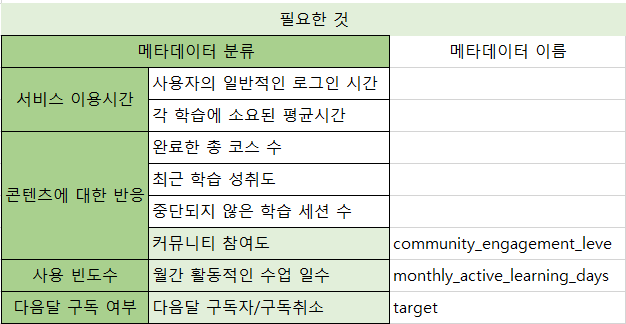

--------------------------

### 데이터 분석 기본 세팅

In [33]:
import pandas as pd

In [34]:
df = pd.read_table('data/mini.csv',sep=',')

In [35]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [37]:
df.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


--------------------------

### 데이터 분석

In [38]:
df_A = df[['monthly_active_learning_days', 'community_engagement_level', 'target']]
df_A

,monthly_active_learning_days,community_engagement_level,target
0,18,4,0
1,16,3,1
2,13,4,1
3,19,3,1
4,19,4,1
...,...,...,...
9995,18,5,1
9996,9,3,1
9997,24,5,1
9998,10,5,1


In [39]:
# 월간 활동적인 학습 일수의 평균(반올림한 값)
round(df_A['monthly_active_learning_days'].mean())

13

In [40]:
# 커뮤니티 참여도의 평균(정수화한 값)
int(df['community_engagement_level'].mean())

3

In [41]:
# 월간 활동적인 학습 일수의 평균(13) 이상인 유저
df_M=df_A[df_A['monthly_active_learning_days'] >= 13]
df_M

,monthly_active_learning_days,community_engagement_level,target
0,18,4,0
1,16,3,1
2,13,4,1
3,19,3,1
4,19,4,1
...,...,...,...
9987,14,5,0
9988,18,5,1
9993,14,5,1
9995,18,5,1


In [42]:
# 월간 활동적인 학습 일수의 평균(13) 이상인 유저 중, 커뮤니티 참여도의 평균(3)이상인 유저
df_C = df_M[df_M['community_engagement_level'] >= 3]
df_C

,monthly_active_learning_days,community_engagement_level,target
0,18,4,0
1,16,3,1
2,13,4,1
3,19,3,1
4,19,4,1
...,...,...,...
9987,14,5,0
9988,18,5,1
9993,14,5,1
9995,18,5,1


In [43]:
df_T=df_C.groupby("target")["monthly_active_learning_days"].count()
df_T.index = ['구독 취소', '구독']
df_T

구독 취소    1563
구독       2526
Name: monthly_active_learning_days, dtype: int64

In [44]:
df_T.values

array([1563, 2526], dtype=int64)

--------------------------------------------------

### 데이터 시각화

In [45]:
import matplotlib.pyplot as plt
import koreanize_matplotlib 

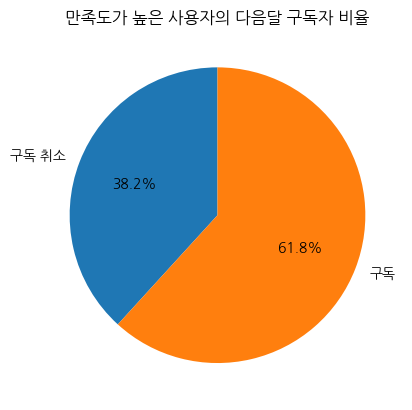

In [46]:
plt.pie(df_T.values, labels = df_T.index, autopct='%.1f%%', startangle=90, counterclock=True)
plt.title('만족도가 높은 사용자의 다음달 구독자 비율')
plt.show()

-----------------------------------------------

## 결론 도출

앞으로 **'월간 활동적인 수업 일수'** 가 **평균 13일 이상** 이고, **'커뮤니티 참여도'** 가 1~5단계 중 **4단계 이상** 인 사용자들이 <U>구독을 연장</U> 할 확률이 높다!

------------------------------------------------------------------------------------------